<a href="https://colab.research.google.com/github/shreyshv/face-verification-accuracy/blob/main/Verification_Accuracy_Fawkes_Test_V_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages
!pip install deepface mtcnn scikit-learn gradio_client tensorflow keras_cv datasets

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import requests
from enum import Enum
from typing import Literal
from sklearn.metrics.pairwise import cosine_similarity
from gradio_client import Client, handle_file
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from datasets import load_dataset

# Try importing potentially problematic modules
try:
    from mtcnn import MTCNN
    from deepface import DeepFace
    from deepface.modules.verification import find_threshold
except ImportError as e:
    print(f"Error importing module: {e}")
    print("Please make sure all required packages are installed correctly.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.4 MB/s eta 0:00:00
   ━━━

Loaded as API: https://shreysh-fawkes-v-0-1.hf.space ✔
Loaded as API: https://shreysh-lowkey-v-0-2.hf.space ✔
Loaded as API: https://shreysh-advcolorfilter-v-0-1.hf.space ✔
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━

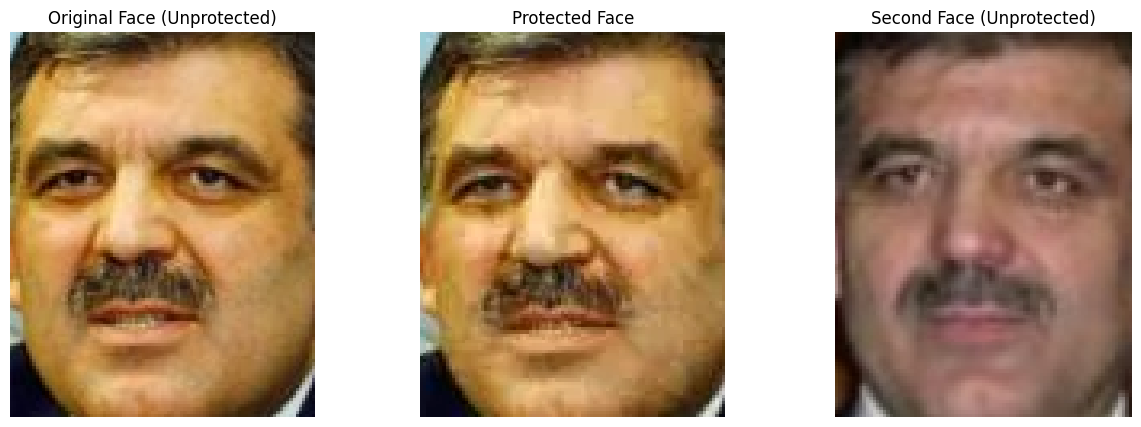

Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[2]]


In [ ]:
# Install required packages
!pip install deepface mtcnn scikit-learn gradio_client tensorflow keras_cv datasets

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import requests
from enum import Enum
from typing import Literal
from sklearn.metrics.pairwise import cosine_similarity
from gradio_client import Client, handle_file
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from datasets import load_dataset

# Try importing potentially problematic modules
try:
    from mtcnn import MTCNN
    from deepface import DeepFace
    from deepface.modules.verification import find_threshold
except ImportError as e:
    print(f"Error importing module: {e}")
    print("Please make sure all required packages are installed correctly.")

# Initialize API clients
fawkes_client = Client("shreyshv/Fawkes_V_0.1")
lowkey_client = Client("shreyshv/Lowkey_V_0.2")
advcolorfilter_client = Client("shreyshv/AdvColorFilter_V_0.1")

class FaceEmbedEnum(str, Enum):
    VGGFACE = "VGG-Face"
    FACENET = "Facenet"
    DEEPID = "DeepID"
    ARCFACE = "ArcFace"

    def get_threshold(
            self,
            distance: Literal["cosine", "euclidean", "euclidean_l2"] = "cosine",
        ) -> float:
        return find_threshold(self.value, distance)

def process_image_with_api(image, protection_level=None, api_name="fawkes", max_iterations=100, steps=64, bound=16, lr=1):
    # Save the image temporarily to use with APIs
    image_path = "temp_image.jpg"
    Image.fromarray(image).save(image_path)

    if api_name == "fawkes":
        client = fawkes_client
        result = client.predict(
            image=handle_file(image_path),
            protection_level=protection_level,
            api_name="/predict"
        )
    elif api_name == "lowkey":
        client = lowkey_client
        result = client.predict(
            img=handle_file(image_path),
            api_name="/predict"
        )
    elif api_name == "advcolorfilter":
        client = advcolorfilter_client
        result = client.predict(
            input_image=handle_file(image_path),
            max_iterations=max_iterations,
            steps=steps,
            bound=bound,
            lr=lr,
            api_name="/predict"
        )
    else:
        raise ValueError(f"Unknown API name: {api_name}")

    if isinstance(result, str):
        if result.startswith('http'):
            response = requests.get(result)
            return np.array(Image.open(io.BytesIO(response.content)))
        else:
            return np.array(Image.open(result))
    elif isinstance(result, bytes):
        return np.array(Image.open(io.BytesIO(result)))
    else:
        raise TypeError(f"Unexpected result type: {type(result)}")

def crop_image(img):
    detector = MTCNN()
    data = detector.detect_faces(img)
    biggest = 0
    if data:
        for faces in data:
            box = faces['box']
            area = box[3] * box[2]
            if area > biggest:
                biggest = area
                bbox = box
        bbox[0] = max(0, bbox[0])
        bbox[1] = max(0, bbox[1])
        img = img[bbox[1]: bbox[1]+bbox[3], bbox[0]: bbox[0]+ bbox[2]]
        return True, img
    else:
        return False, None

def extract_features(face_images, model_name):
    features = []
    for image in face_images:
        result = DeepFace.represent(image, model_name=model_name, enforce_detection=False)
        if result:
            features.append(result[0]['embedding'])
    return features

def cosine_similarity_score(feature1, feature2):
    return cosine_similarity([feature1], [feature2])[0][0]

def verify_faces(features_img_0, features_img_1, model_name_enum, distance_metric):
    embedding_0 = features_img_0[0]  # Extract the first embedding
    embedding_1 = features_img_1[0]  # Extract the first embedding
    similarity_score = cosine_similarity_score(embedding_0, embedding_1)
    threshold = model_name_enum.get_threshold(distance_metric)
    is_match = similarity_score > threshold
    return is_match, similarity_score, threshold

def process_image_pair(img_0, img_1, api_name, protection_level="low", model_name="DEEPID", max_iterations=100, steps=64, bound=16, lr=1):
    # Step 1: Apply protection using the chosen API to img_0
    protected_img_0 = process_image_with_api(
        img_0, protection_level=protection_level, api_name=api_name,
        max_iterations=max_iterations, steps=steps, bound=bound, lr=lr
    )

    # Step 2: Face Extraction
    status_orig, detected_img_orig = crop_image(img_0)
    status_prot, detected_img_prot = crop_image(protected_img_0)
    status_img_1, detected_img_img_1 = crop_image(img_1)

    if not (status_orig and status_prot and status_img_1):
        print("Face detection failed for one or more images.")
        return

    # Step 3: Feature Extraction
    model_name_enum = FaceEmbedEnum[model_name.upper()]
    features_orig = extract_features([detected_img_orig], model_name_enum.value)
    features_prot = extract_features([detected_img_prot], model_name_enum.value)
    features_img_1 = extract_features([detected_img_img_1], model_name_enum.value)

    # Step 4: Feature Matching
    # 4.1: Compare protected img_0 with img_1
    is_match_protected, similarity_score_protected, threshold = verify_faces(features_prot, features_img_1, model_name_enum, "cosine")

    # 4.2: Compare unprotected img_0 with img_1
    is_match_unprotected, similarity_score_unprotected, _ = verify_faces(features_orig, features_img_1, model_name_enum, "cosine")

    # Display comparison results
    print(f"Protected Similarity Score: {similarity_score_protected} (Threshold: {threshold}) - Is Match: {is_match_protected}")
    print(f"Unprotected Similarity Score: {similarity_score_unprotected} - Is Match: {is_match_unprotected}")

    # Step 5: Visualize results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(detected_img_orig)
    axes[0].set_title("Original Face (Unprotected)")
    axes[0].axis('off')
    axes[1].imshow(detected_img_prot)
    axes[1].set_title("Protected Face")
    axes[1].axis('off')
    axes[2].imshow(detected_img_img_1)
    axes[2].set_title("Second Face (Unprotected)")
    axes[2].axis('off')
    plt.show()

    # Collect predictions and ground truth for metric calculation
    predictions = [1 if is_match_protected else 0, 1 if is_match_unprotected else 0]
    labels = [1, 1]  # Assuming the pairs are actual matches in this case

    # Calculate metrics
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    conf_matrix = confusion_matrix(labels, predictions)

    print("Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(conf_matrix)

# Load the LFW dataset
dataset = load_dataset("logasja/lfw", "pairs")
dataset = dataset['train'].to_tf_dataset(batch_size=1).map(lambda x: {
    'pair': tf.cast(x['pair'], tf.bool),
    'img_0': tf.cast(x['img_0'], tf.uint8),
    'img_1': tf.cast(x['img_1'], tf.uint8)
})

# Example usage on a few pairs
api_name = "fawkes"  # Options: "fawkes", "lowkey", "advcolorfilter"
protection_level = "high"  # Only for Fawkes and Lowkey
model_name = "DEEPID"  # Options: "VGGFACE", "FACENET", "DEEPID", "ARCFACE"
max_iterations = 100  # Only for AdvColorFilter
steps = 64  # Only for AdvColorFilter
bound = 16  # Only for AdvColorFilter
lr = 1  # Only for AdvColorFilter

for example in dataset.take(1):
    img_0 = example['img_0'].numpy()[0]
    img_1 = example['img_1'].numpy()[0]

    process_image_pair(img_0, img_1, api_name, protection_level, model_name, max_iterations, steps, bound, lr)